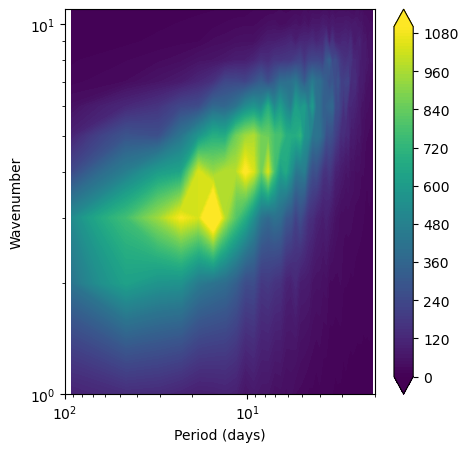

In [23]:
#!/usr/bin python
  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import os
import sys
from netCDF4 import Dataset
import subprocess

# input


threshold=3.5
#threshold=3.5 #only select years with heatwaves above this threshold
#threshold=-np.inf # select all heatwaves

area = 'Scandinavia'
T = 30 # running mean in days
latnorth= 75 #int(sys.argv[3])#80#60#70#75#80
latsouth= 55 #int(sys.argv[2])#70#50#60#55#40

#output
outfolder='Hayashi'

infolder='Hayashi'
inname='test_Hayashi_output'+area+'_'+str(T)+'_'+str(threshold)+'_'+str(latsouth)+'_'+str(latnorth)
# output 

outfolder=infolder
outname='Hayashi_test'+area+'_'+str(T)+'_'+str(threshold)+'_'+str(latsouth)+'_'+str(latnorth)
###############################################################


npzfile=np.load(infolder+'/'+inname+'.npz')
locals().update(npzfile)

#normalization terms (frequency and wavenumber)
time=np.arange(0,0.5,1/ntime)
zonal=np.arange(0,nlon/2+1)

#time period
period=1/time[1:int(ntime/2)+1]

#normalization
for itime in range(int(ntime/2)):
    for ilon in range(int(nlon/2)):
        avepeast[itime,ilon] = avepeast[itime,ilon] *time[itime]*zonal[ilon]*ntime
        avepwest[itime,ilon] = avepwest[itime,ilon] *time[itime]*zonal[ilon]*ntime
        avetr[itime,ilon]    =    avetr[itime,ilon] *time[itime]*zonal[ilon]*ntime
        avetreast[itime,ilon]=avetreast[itime,ilon] *time[itime]*zonal[ilon]*ntime
        avetrwest[itime,ilon]=avetrwest[itime,ilon] *time[itime]*zonal[ilon]*ntime
        avetotF[itime,ilon]  =  avetotF[itime,ilon] *time[itime]*zonal[ilon]*ntime
        avestaF[itime,ilon]  =  avestaF[itime,ilon] *time[itime]*zonal[ilon]*ntime
        avestaP[itime,ilon]  =  avestaP[itime,ilon] *time[itime]*zonal[ilon]*ntime
        avetotP[itime,ilon]  =  avetotP[itime,ilon] *time[itime]*zonal[ilon]*ntime

#meshgrid (using period instead of frequency)
wn,per=np.meshgrid(zonal[1:12],period[0:int(ntime/2)+1])

avetotF=np.real(avetotF)
avestaF=np.real(avestaF)
avepeast=np.real(avepeast)
avepwest=np.real(avepwest)

#color_levels = np.arange(0,1400+50,50)
color_levels = np.arange(0,1100+10,10)
col_map = "viridis" #sys.argv[4]#"viridis"

if threshold < -10:
    threshold = '$-\infty$'
    
    
#eastward propagating component
plt.figure(figsize=(5, 5))
plt.contourf(per,wn,avepeast[1:int(ntime/2),1:12], color_levels, cmap=col_map, extend='both')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Wavenumber')
plt.xlim((100,2))
plt.colorbar()
#plt.contour(per,wn,avepeast[1:int(ntime/2),1:12], color_levels, colors='black', linewidths=.5, extend='both')
#plt.title(r'$H_E(k,\omega)$ th = '+str(threshold)+' over ' +str(latsouth)+' to '+str(latnorth))

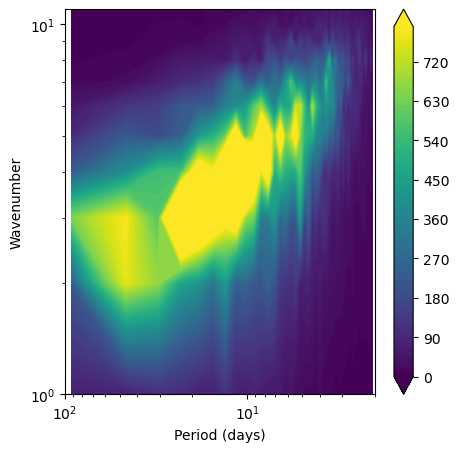

In [4]:
#eastward propagating component
plt.figure(figsize=(5, 5))
plt.contourf(per,wn,avepeast[1:int(ntime/2),1:12], color_levels, cmap=col_map, extend='both')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Wavenumber')
plt.xlim((100,2))
plt.colorbar()
#plt.contour(per,wn,avepeast[1:int(ntime/2),1:12], color_levels, colors='black', linewidths=.5, extend='both')
#plt.title(r'$H_E(k,\omega)$ th = '+str(threshold)+' over ' +str(latsouth)+' to '+str(latnorth))

In [ ]:

#total spectrum
plt.figure(figsize=(5, 5))
plt.contourf(per,wn,avetotF[1:int(ntime/2),1:12], 2*color_levels, cmap=col_map, extend='both')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Wavenumber')
plt.xlim((100,2))
plt.colorbar()
#plt.contour(per,wn,avetotF[1:int(ntime/2),1:12], 2*color_levels, colors='black', linewidths=.5, extend='both')
#plt.title(r'$H_T(k,\omega)$ th = '+str(threshold)+' over ' +str(latsouth)+' to '+str(latnorth))
plt.savefig(outfolder+'/'+outname+'_avetotF.png', bbox_inches='tight', dpi=200)


#stationary component
plt.figure(figsize=(5, 5))
plt.contourf(per,wn,avestaF[1:int(ntime/2),1:12], color_levels, cmap=col_map, extend='both')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Wavenumber')
plt.xlim((100,2))
plt.colorbar()
#plt.contour(per,wn,avestaF[1:int(ntime/2),1:12], color_levels, colors='black', linewidths=.5, extend='both')
#plt.title(r'$H_S(k,\omega)$ th = '+str(threshold)+' over ' +str(latsouth)+' to '+str(latnorth))
plt.savefig(outfolder+'/'+outname+'_avestaF.png', bbox_inches='tight', dpi=200)

#eastward propagating component
plt.figure(figsize=(5, 5))
plt.contourf(per,wn,avepeast[1:int(ntime/2),1:12], color_levels, cmap=col_map, extend='both')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Wavenumber')
plt.xlim((100,2))
plt.colorbar()
#plt.contour(per,wn,avepeast[1:int(ntime/2),1:12], color_levels, colors='black', linewidths=.5, extend='both')
#plt.title(r'$H_E(k,\omega)$ th = '+str(threshold)+' over ' +str(latsouth)+' to '+str(latnorth))
plt.savefig(outfolder+'/'+outname+'_avepeast.png', bbox_inches='tight', dpi=200)

#westward propagating component
plt.figure(figsize=(5, 5))
plt.contourf(per,wn,avepwest[1:int(ntime/2),1:12], color_levels, cmap=col_map, extend='both')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Period (days)')
plt.ylabel('Wavenumber')
plt.xlim((100,2))
plt.colorbar()
#plt.contour(per,wn,avepwest[1:int(ntime/2),1:12], color_levels, colors='black', linewidths=.5, extend='both')
#plt.title(r'$H_W(k,\omega)$ th = '+str(threshold)+' over ' +str(latsouth)+' to '+str(latnorth))
plt.savefig(outfolder+'/'+outname+'_avepwest.png', bbox_inches='tight', dpi=200)
plt.show()
